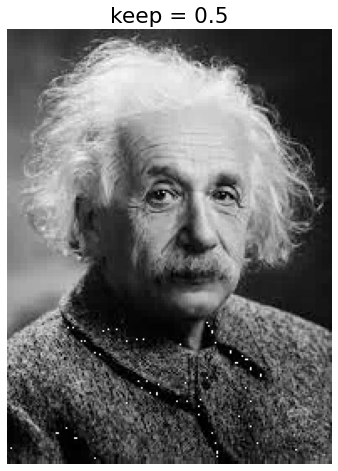

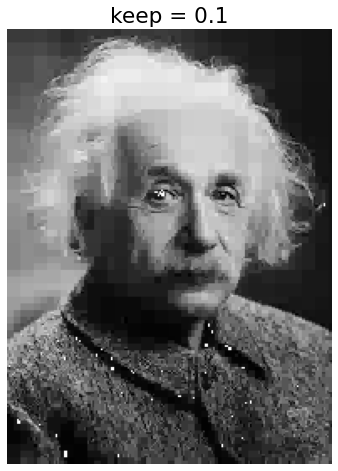

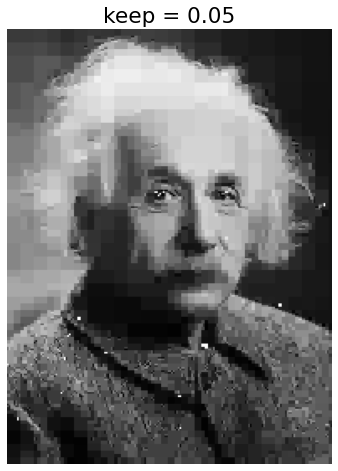

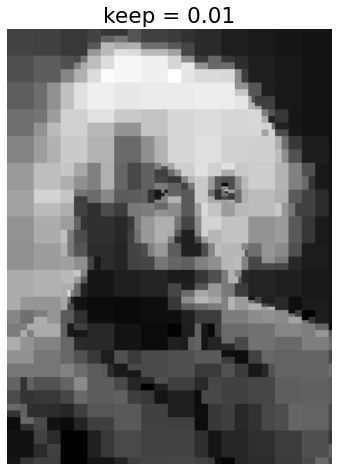

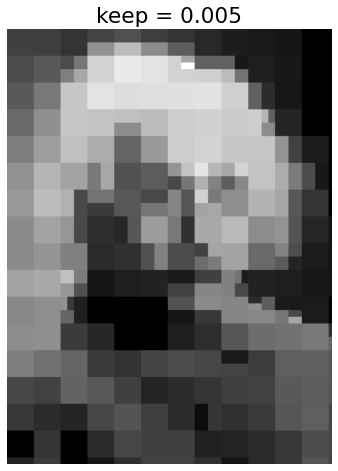

In [7]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

A = imread('einstein.jfif')
B = np.mean(A, -1); # Convert RGB to grayscale

## Wavelet Compression
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.5, 0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))